# Predicting car prices using K Nearest Neighbors in Scikit learn

This is an example to demonstrate the prediction of car prices using the K Nearest Neighbors classification algorithm. The dataset is from UCI's Machine learning Repository and can be found here [https://archive.ics.uci.edu/ml/datasets/automobile] along with the column descriptions.




# Read the dataset into a Pandas Dataframe

In [153]:
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In order for us to select the correct features to apply KNN, we need to understand which columns are numeric in nature as only numeric values can be used in the KNN algorithm.

In [154]:
print(cars.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


Let us select the columns with continous values and discard the rest

In [155]:
continous_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 
                     'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] 

numeric_cars = cars[continous_columns]
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,?


# Data cleaning

Removing "?" values from the "normalized-losses" column with its mean, converting the columns to float and counting NaN values.

In [156]:
numeric_cars = numeric_cars.replace(to_replace='?', value = np.nan)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [157]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

 As we would like to predict the price column, let's drop any rows which have missing price values.

In [158]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Let us replace missing values in other columns using mean values

In [159]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now lets normalize all the columns in the range 0 to 1 except the target one ("price")

In [160]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars.max() - numeric_cars)/(numeric_cars.max())
numeric_cars['price'] = price_col
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,13495.0
1,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,16500.0
2,0.523438,0.218362,0.177319,0.090278,0.123746,0.305706,0.319797,0.167866,0.608696,0.412214,0.242424,0.612245,0.518519,16500.0
3,0.359375,0.174524,0.151370,0.080556,0.091973,0.425234,0.190355,0.184652,0.565217,0.610687,0.166667,0.510204,0.444444,13950.0
4,0.359375,0.177833,0.151370,0.077778,0.091973,0.305460,0.190355,0.184652,0.652174,0.561069,0.166667,0.632653,0.592593,17450.0
5,0.523438,0.174524,0.148006,0.079167,0.112040,0.383424,0.190355,0.184652,0.630435,0.580153,0.166667,0.612245,0.537037,15250.0
6,0.382812,0.124897,0.074003,0.008333,0.068562,0.300541,0.190355,0.184652,0.630435,0.580153,0.166667,0.612245,0.537037,17710.0
7,0.523438,0.124897,0.074003,0.008333,0.068562,0.273487,0.190355,0.184652,0.630435,0.580153,0.166667,0.612245,0.537037,18920.0
8,0.382812,0.124897,0.074003,0.008333,0.065217,0.241023,0.205584,0.184652,0.639130,0.465649,0.166667,0.653061,0.629630,23875.0
10,0.250000,0.162945,0.150408,0.100000,0.091973,0.410969,0.111675,0.328537,0.617391,0.614504,0.121212,0.530612,0.462963,16430.0


# Univariate KNN Model testing

Now that the columns are normalized its more accurate to train and test the features, obtain the predicted price and decide the best feature or set of features. Lets start by creating a general function to train and test a model and lastly calculate the Mean Squared and Root Mean Squared Error. 

In [161]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df):

    #Initializing an instance of KNN Classifier
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index) #  Shuffling the index of the dataframe and reindexing
    rand_df = df.reindex(shuffled_index)
       
    #Splitting df into Train and Test sets
    df_half_length = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:df_half_length]
    test_df = rand_df.iloc[df_half_length:]
    
    #Fitting a Model, computing predicted values and calculating Root Mean Squared Error
    knn.fit(train_df[[train_col]],train_df[target_col])
    
    predicted_value = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col],predicted_value)
    rmse = np.sqrt(mse)
    return rmse

rmse_values = {}
training_cols = numeric_cars.columns.drop('price') # Compiling a list of training columns

# Calculating the RMSE values for each of the numeric columns
for cols in training_cols:
    rsme_nth = knn_train_test(cols,'price',numeric_cars)
    rmse_values[cols] = rsme_nth
    
rmse_results_series = pd.Series(rmse_values)
rmse_results_series.sort_values()

horsepower           4007.472352
curb-weight          4437.934395
highway-mpg          4579.037250
width                4644.898429
city-mpg             4729.673421
length               5382.671155
wheel-base           5527.682489
compression-rate     6736.676353
bore                 6816.853712
height               7487.652519
peak-rpm             7498.746475
normalized-losses    7635.170416
stroke               8078.491289
dtype: float64

These are the root mean squared error values for each of the features after training the model.

# Modify the function to use different K values

In [162]:
def knn_train_test(train_col_name,target_col_name,df,k_list):
    np.random.seed(1)
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index) #  Shuffling the index of the dataframe and reindexing
    rand_df = df.reindex(shuffled_index)
    k_rmses = {}
    
    for i in k_list:
        #Initializing an instance of KNN Classifier
        knn = KNeighborsRegressor(n_neighbors=i)
    
        #Splitting df into Train and Test sets
        df_half_length = int(len(rand_df)/2)
        train_df = rand_df.iloc[0:df_half_length]
        test_df = rand_df.iloc[df_half_length:]

        #Fitting a Model, computing predicted values and calculating Root Mean Squared Error
        knn.fit(train_df[[train_col_name]],train_df[target_col_name])
        predicted_value = knn.predict(test_df[[train_col_name]])
        mse = mean_squared_error(test_df[target_col_name],predicted_value)
        rmse = mse ** (1/2)
        k_rmses[i] = rmse
    return k_rmses

In [163]:
k_rmse_results = {}
k_list= [1,3,5,7,9]

# Calculating the RMSE values for each of the numeric columns for different values of k
for cols in training_cols:
    rsme_nth = knn_train_test(cols,'price',numeric_cars,k_list)
    k_rmse_results[cols] = rsme_nth
    
k_rmse_results

{'bore': {1: 7496.1492312406444,
  3: 6936.9888741632003,
  5: 6816.8537123691885,
  7: 7062.0613050538341,
  9: 6869.7274373649016},
 'city-mpg': {1: 4540.3610032247389,
  3: 4662.4683767438482,
  5: 4729.6734209992692,
  7: 5099.2742894698586,
  9: 4999.2917237740958},
 'compression-rate': {1: 9024.9026779536325,
  3: 7033.5529229950389,
  5: 6736.676353123451,
  7: 7459.1131944220724,
  9: 7219.385481303907},
 'curb-weight': {1: 5518.8832374058084,
  3: 5048.6077260366692,
  5: 4437.9343946355393,
  7: 4369.3490898512136,
  9: 4632.2055452210743},
 'height': {1: 9108.4718365936551,
  3: 8049.9871472883196,
  5: 7487.6525188849646,
  7: 7753.7974180840583,
  9: 7695.632426557866},
 'highway-mpg': {1: 5270.360471073066,
  3: 4618.1866223408379,
  5: 4579.0372499290315,
  7: 4914.2600028726101,
  9: 5181.9124189636359},
 'horsepower': {1: 3749.5962185254293,
  3: 3964.9503610053594,
  5: 4007.4723516831596,
  7: 4391.4816735297054,
  9: 4505.1886320053109},
 'length': {1: 5291.78516454

# Plotting results using Matplotlib
Let us visualize the results in a plot

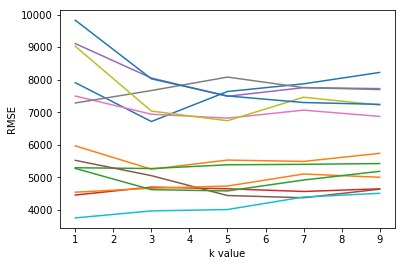

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate KNN Model testing

First let's compute the average RMSE of each feature for different values of K.

In [165]:
feature_avg_rmse = {}  # Dict to store feature average RMSE values 
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse = series_avg_rmse.sort_values()
series_avg_rmse

horsepower           4123.737847
width                4600.272698
curb-weight          4801.395999
city-mpg             4806.213763
highway-mpg          4912.751353
length               5351.716651
wheel-base           5591.790931
bore                 7036.356112
compression-rate     7494.726126
normalized-losses    7669.373476
stroke               7700.844238
peak-rpm             7977.094835
height               8019.108269
dtype: float64

Now the can easily identify the best and worst features. 

We will now apply the above KNN logic to calculate the MSE and RMSE for multiple columns. First let's work with the default K value and then try changing the values of K.

In [171]:
def knn_train_test_cols(train_col_list,target_col,df):

    #Initializing an instance of KNN Classifier
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index) #  Shuffling the index of the dataframe and reindexing
    rand_df = df.reindex(shuffled_index)
       
    #Splitting df into Train and Test sets
    df_half_length = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:df_half_length]
    test_df = rand_df.iloc[df_half_length:]
    
    #Specifying the value of K (currently using default k=5)
    k_values = [5]
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        #Fitting a Model, computing predicted values and calculating Root Mean Squared Error
        knn.fit(train_df[train_col_list],train_df[target_col])
        predicted_value = knn.predict(test_df[train_col_list])
    
        mse = mean_squared_error(test_df[target_col],predicted_value)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

k_rmse_values = {}
two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test_cols(two_best_features, 'price', numeric_cars)
k_rmse_values["two_best_features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test_cols(three_best_features, 'price', numeric_cars)
k_rmse_values["three_best_features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test_cols(four_best_features, 'price', numeric_cars)
k_rmse_values["four_best_features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test_cols(five_best_features, 'price', numeric_cars)
k_rmse_values["five_best_features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test_cols(six_best_features, 'price', numeric_cars)
k_rmse_values["six_best_features"] = rmse_val
k_rmse_values

{'five_best_features': {5: 3346.6737097607775},
 'four_best_features': {5: 3232.1036292326721},
 'six_best_features': {5: 3398.1290113563641},
 'three_best_features': {5: 3212.5596306057919},
 'two_best_features': {5: 3681.3980922556266}}

Now we just repeat the above for different values of K

In [172]:
def knn_train_test_cols(train_col_list,target_col,df):

    #Initializing an instance of KNN Classifier
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index) #  Shuffling the index of the dataframe and reindexing
    rand_df = df.reindex(shuffled_index)
       
    #Splitting df into Train and Test sets
    df_half_length = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:df_half_length]
    test_df = rand_df.iloc[df_half_length:]
    
    #Specifying the value of K (currently using default k=5)
    k_values = [i for i in range(1,25)]
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        #Fitting a Model, computing predicted values and calculating Root Mean Squared Error
        knn.fit(train_df[train_col_list],train_df[target_col])
        predicted_value = knn.predict(test_df[train_col_list])
    
        mse = mean_squared_error(test_df[target_col],predicted_value)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

k_rmse_values = {}
two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test_cols(two_best_features, 'price', numeric_cars)
k_rmse_values["two_best_features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test_cols(three_best_features, 'price', numeric_cars)
k_rmse_values["three_best_features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test_cols(four_best_features, 'price', numeric_cars)
k_rmse_values["four_best_features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test_cols(five_best_features, 'price', numeric_cars)
k_rmse_values["five_best_features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test_cols(six_best_features, 'price', numeric_cars)
k_rmse_values["six_best_features"] = rmse_val
k_rmse_values

{'five_best_features': {1: 2561.7319037195625,
  2: 2567.2749455482176,
  3: 2949.9007889192553,
  4: 3074.6091106298891,
  5: 3346.6737097607775,
  6: 3686.4646211770864,
  7: 3907.1959982578019,
  8: 4104.0339873177718,
  9: 4335.7141974258602,
  10: 4463.6007084810435,
  11: 4444.0259889090448,
  12: 4534.547516044051,
  13: 4638.5257014541967,
  14: 4686.7680627393893,
  15: 4676.6172318274348,
  16: 4706.4889916373404,
  17: 4714.757468354599,
  18: 4724.0179262108768,
  19: 4780.0364569672583,
  20: 4790.8654014852591,
  21: 4788.4429142051176,
  22: 4820.2560355653704,
  23: 4823.6246116515467,
  24: 4830.7715122893824},
 'four_best_features': {1: 3135.5489073677436,
  2: 2514.1812009849527,
  3: 2788.5519417420178,
  4: 2917.4679936225316,
  5: 3232.1036292326721,
  6: 3566.725419074407,
  7: 3834.9804809872821,
  8: 3927.3952487590609,
  9: 4078.9765839753827,
  10: 4199.8376270003955,
  11: 4345.0069904611819,
  12: 4451.3870113027624,
  13: 4550.1634683008278,
  14: 4591.534

Lastly let us plot the variation between K value and RMSE in Matplotlib to help understand it better

C:\Users\Ericsda\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


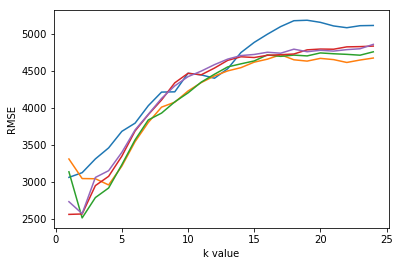

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend()
plt.show()

We can see from the above plot that the lowest Root mean squared error occurs somewhere around K=2 or 3. 